## K-means clustering

In this notebook, we'll cluster sequences to find similar sequences with similar patterns.

In [1]:
### Loading in libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
### Read in data. We'll store our data in a dataframe called 'df'

df = pd.read_csv('Alignment-HitTable.csv', header = None)
df.columns = ['query acc.verr', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 
             'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df.head()

,query acc.verr,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,MN997409.1,MN997409.1,100.00,29882,0,0,1,29882,1,29882,0.0,55182
1,MN997409.1,MT020881.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MT020880.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN985325.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,MN975262.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166


In [3]:
## Part A (25 pts)

## Fit a K-means clustering with 5 clusters and a random state of 10 on the numeric columns in the dataframe.
## Store the predicted groups in a variable called 'y_pred'. 

# your code here
df_numeric = df[['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end',
        's. start', 's. end', 'evalue', 'bit score']]

kmeans = KMeans(n_clusters=5, random_state=10).fit(df_numeric)
y_pred = kmeans.predict(df_numeric)
cluster_labels = kmeans.fit_predict(df_numeric)

In [4]:
### Part B (15 pts)

## Store the silhouette score on the predicted groups in a variable called 'score'.
## Hint: Use https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# your code here
from sklearn.metrics import silhouette_score
score = silhouette_score(df_numeric,labels=cluster_labels,random_state=10)
score

0.9631789756168802

In [5]:
## Part C (30 pts)

## Store the silhouette scores for clusters 2 to 9 in a list called 'silhouette_scores'.
## Use a random state of 0 for each prediction.

# your code here
silhouette_scores = []

for i in range(2,10):
    clusterer = KMeans(n_clusters=i, random_state=0)
    cluster_labels = clusterer.fit_predict(df_numeric)
    x = silhouette_score(df_numeric, cluster_labels, random_state=0)
    silhouette_scores.append(x)

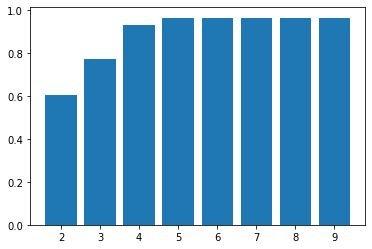

In [6]:
plt.bar(range(2, len(silhouette_scores) +2), silhouette_scores)
plt.show()

In [7]:
## Part D (30 pts)

## Use a K-means clustering with 5 clusters on the normalized numeric dataframe. Use a random state of 0.
## Hint: Use the https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html to scale the data.
## Store the cluster centers in a dataframe called 'cluster_centers'. 
## Use the index ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'] on the dataframe.

# your code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_numeric_scaled = scaler.fit_transform(df_numeric)

kmeans = KMeans(n_clusters=5, random_state=0).fit(df_numeric_scaled)
y_pred = kmeans.predict(df_numeric_scaled)
cluster_labels = kmeans.fit_predict(df_numeric_scaled)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, 
                               index=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                               columns=df_numeric.columns)
cluster_centers

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
Cluster 1,-0.870350,-0.832821,-0.516444,-0.399602,-0.939626,-1.882316,-0.938606,-1.881958,0.0,-0.670826
Cluster 2,0.567963,-0.836261,-0.700122,-0.750690,1.383502,0.736628,1.383326,0.731892,0.0,-0.609998
Cluster 3,1.831476,1.805691,-0.842913,-0.953267,-0.940923,0.726534,-0.938919,0.735923,0.0,2.113035
Cluster 4,-0.463023,0.674308,1.844861,1.765292,-0.618618,-0.036828,-0.622000,-0.037405,0.0,0.066769
Cluster 5,-0.787871,-0.500757,0.067143,0.177795,0.936400,0.560857,0.937356,0.558123,0.0,-0.535366
